In [ ]:
#Start des Codes
#Import der unterschiedlichen Bibliotheken und Paketen

import pandas as pd
import geopandas as gpd
import os
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union
from shapely import is_valid
from shapely.validation import make_valid
from shapely.geometry import Polygon, MultiPolygon

In [3]:
#Einladen der Eingangsdateien als Shape Datei

in_features_FFH = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/FFH.shp"
in_features_GebaeudeBauwerk = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/GebaeudeBauwerk.shp"
in_features_WSG = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/main_WSG_Bremen_Niedersachsen.shp"
in_features_NSG = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/NSG.shp"
in_features_VSG = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/VSG.shp"
in_features_LSG = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/LSG.shp"
in_features_Windenergieanlagen = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/Windenergieanlagenstandorte_FHB_19122023.shp"
in_features_NutzungFlurstueck = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/NutzungFlurstueck.shp"
#in_feature_Baumkronen = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/XXX.shp"

# Pfad zum Zielgebiet Polygon
# Datei muss stand jetzt manuell im Ordner zu "Zielgebiet" umbenannt werden, ansonsten parametrisieren
in_feature_Zielgebiet = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/Zielgebiet.shp"

In [4]:
#Einlesen der Dateien als GeoDataFrame

Zielgebiet_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/Zielgebiet.shp")

FFH_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/FFH.shp")
GebaeudeBauwerk_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/GebaeudeBauwerk.shp")
WSG_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/main_WSG_Bremen_Niedersachsen.shp")
NSG_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/NSG.shp")
LSG_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/LSG.shp")
VSG_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/VSG.shp")
Windenergieanlagenstandorte_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/Windenergieanlagenstandorte_FHB_19122023.shp")
NutzungFlurstuecke_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/NutzungFlurstueck.shp")
#Baumkkronen_gdf = gpd.read_file("/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/XXX.shp")



In [56]:

FFH_gdf.to_crs(Zielgebiet_gdf.crs, inplace=True)
GebaeudeBauwerk_gdf.to_crs(Zielgebiet_gdf.crs, inplace=True)
WSG_gdf.to_crs(Zielgebiet_gdf.crs, inplace=True)
NSG_gdf.to_crs(Zielgebiet_gdf.crs, inplace=True)
LSG_gdf.to_crs(Zielgebiet_gdf.crs, inplace=True)
VSG_gdf.to_crs(Zielgebiet_gdf.crs, inplace=True)
Windenergieanlagenstandorte_gdf.to_crs(Zielgebiet_gdf.crs, inplace=True)
NutzungFlurstuecke_gdf.to_crs(Zielgebiet_gdf.crs, inplace=True)

#Baumkkronen_gdf.to_crs(Zielgebiet_gdf.crs, inplace=True)

print(FFH_gdf.crs)


EPSG:25832


In [57]:
#Filtern der ALKIS-Daten über die Nutzung der Flurstücke
#Filtern der Daten basierend auf der Bedingung (NUTZART) und den Bezeichnungen (Bahnverkehr und Strassenverkehr)

# Pfad zur Ausgabedatei
Straßen_File_filtered = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/Straßen_Polygone.shp"
Wasserkörper_File_filtered = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/Wasserkörper_Polygone.shp"
WeitereStrukturen_File_filtered = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/WeitereStrukturen_Polygone.shp"

#Filtern der Daten nach Bahnverkehr und Strassenverkehr
Straßen_filtered = NutzungFlurstuecke_gdf[NutzungFlurstuecke_gdf['NUTZART'].isin(['Bahnverkehr', 'Strassenverkehr'])]
Wasserkörper_filtered = NutzungFlurstuecke_gdf[NutzungFlurstuecke_gdf['NUTZART'].isin(['Fliessgewaesser', 'Stehendes Gewaesser', 'Schiffsverkehr', 'Hafenbecken'])]
WeitereStrukturen_filtered = NutzungFlurstuecke_gdf[NutzungFlurstuecke_gdf['NUTZART'].isin(['Friedhof'])]

#Neu erstelltes DataFrame zu dem Ergebnis File (OPTIONAL)
Straßen_filtered.to_file(Straßen_File_filtered)
Wasserkörper_filtered.to_file(Wasserkörper_File_filtered)
WeitereStrukturen_filtered.to_file(WeitereStrukturen_File_filtered)

#Überprüfung des Prozesses
print(f"Gefilterte Daten wurden erfolgreich unter {Straßen_File_filtered} gespeichert.")
print(f"Gefilterte Daten wurden erfolgreich unter {Wasserkörper_File_filtered} gespeichert.")
print(f"Gefilterte Daten wurden erfolgreich unter {WeitereStrukturen_File_filtered} gespeichert.")

Gefilterte Daten wurden erfolgreich unter /Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/Straßen_Polygone.shp gespeichert.
Gefilterte Daten wurden erfolgreich unter /Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/Wasserkörper_Polygone.shp gespeichert.
Gefilterte Daten wurden erfolgreich unter /Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Eingangsdaten/WeitereStrukturen_Polygone.shp gespeichert.


In [58]:
#Puffern der Eingabedaten

#Straßen puffern mit 0.5m
Straßen_buffered = Straßen_filtered.copy()
Straßen_buffered['geometry'] = Straßen_buffered['geometry'].buffer(0.5)

#Gebäude puffern mit 2m
Gebäude_buffered = GebaeudeBauwerk_gdf.copy()
Gebäude_buffered['geometry'] = Gebäude_buffered['geometry'].buffer(2)

#Windenergieanlagen puffern mit individuellem Feld des Rotordurchmessers
#Den Befehl paramtrisieren
#Windenergieanlagenstandorte_buffered = Windenergieanlagenstandorte_gdf.copy()
#Windenergieanlagenstandorte_buffered

#Bäume Puffern mit 3m 
#Baumkronen_buffered = input_file.copy()
#Baumkronen_buffered['geometry'] = Baumkronen_buffered['geometry'].buffer(3)


In [59]:
#Dissolve Funktionen ausführen
#entweder auf false setzen oder ganz rausnehmen
dissolve = True

#Dissolve Straßen
if dissolve:
    dissolved_geometry_Straßen = unary_union(Straßen_buffered['geometry'])
    Straßen_dissolved = gpd.GeoDataFrame({'geometry': [dissolved_geometry_Straßen]}, crs= Straßen_buffered.crs)

#Dissolve Gebäude
if dissolve:
    dissolved_geometry_Gebäude = unary_union(Gebäude_buffered['geometry'])
    Gebäude_dissolved = gpd.GeoDataFrame({'geometry': [dissolved_geometry_Gebäude]}, crs=Gebäude_buffered.crs)

#Dissolve Bäume
#if dissolve:
 #   dissolved_geometry_Baumkronen = unary_union(Baumkronen_buffered['geometry'])
  #  Baumkronen_dissolved = gpd.GeoDataFrame({'geometry': [dissolved_geometry_Baumkronen]}, crs=Baumkronen_buffered.crs)

In [60]:
print(Gebäude_buffered.crs)

EPSG:25832


In [12]:

#Zusammenführen aller Ausschlussflächen

#Pfad zur Ausgabedatei
Ausschlussflächen_merged_file = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Berechnungsschritte/Ausschlussflächen_merged_file.GeoJSON"

gdfs = [FFH_gdf, 
        VSG_gdf, 
        WSG_gdf, 
        NSG_gdf, 
        LSG_gdf, 
        Wasserkörper_filtered, 
        WeitereStrukturen_filtered, 
        Straßen_dissolved, 
        Gebäude_dissolved, 
]

#Fehlen in der Liste
#        Windenergieanlagenstandorte_buffered, 
#        Baumkronen_buffered, Baumkronen_dissolved

#Geodataframes einlesen, ist der Spaß hier notwendig? Codesegment eher vorziehen in den ersten Teil, wo alle Eingabedaten eingeladen werden, dann dort Warnungen für nicht vorhandene Eingabedaten ausgeben
#or file in input_files:
     #   if os.path.exists(file):
      #  gdf = gpd.read_file(file)
       # gdfs.append(gdf)
   # else:
    #   print(f"Warnung: {file} wurde nicht gefunden und wird übersprungen.")

# Zusammenführen der GeoDataFrames
Ausschlussflächen_merged = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Zusammengeführte Geometrien speichern
Ausschlussflächen_merged.to_file(Ausschlussflächen_merged_file)

print(f"Zusammengeführte Daten wurden erfolgreich unter {Ausschlussflächen_merged_file} gespeichert.")


Zusammengeführte Daten wurden erfolgreich unter /Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Berechnungsschritte/Ausschlussflächen_merged_file.GeoJSON gespeichert.


In [20]:
# Reparatur der Geometrien

def fix_geometry(geom):
    if geom is None or geom.is_empty:
        return None  # Behandelt leere Geometrien
    if not geom.is_valid:
        return make_valid(geom)  # Repariert ungültige Geometrien
    return geom  # Gültige Geometrien unverändert zurückgeben

Ausschlussflächen_merged['geometry'] = Ausschlussflächen_merged['geometry'].apply(fix_geometry)

In [21]:
# Reparatur der Geometrien

def fix_geometry(geom):
    if geom is None or geom.is_empty:
        return None  # Behandelt leere Geometrien
    if not geom.is_valid:
        return make_valid(geom)  # Repariert ungültige Geometrien
    return geom  # Gültige Geometrien unverändert zurückgeben

Zielgebiet_gdf['geometry'] = Zielgebiet_gdf['geometry'].apply(fix_geometry)

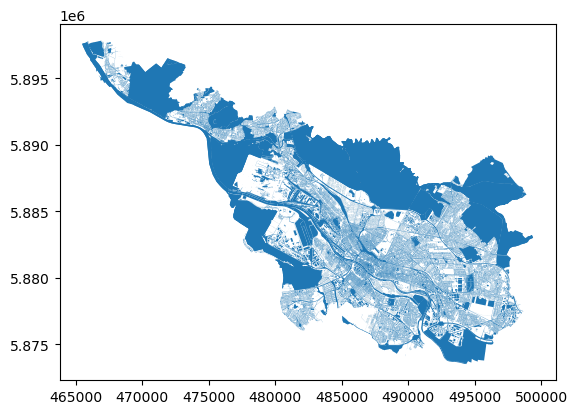

In [42]:
import matplotlib.pyplot as plt

# Ungültige Geometrien plotte
Ausschlussflächen_merged.plot()
plt.show()

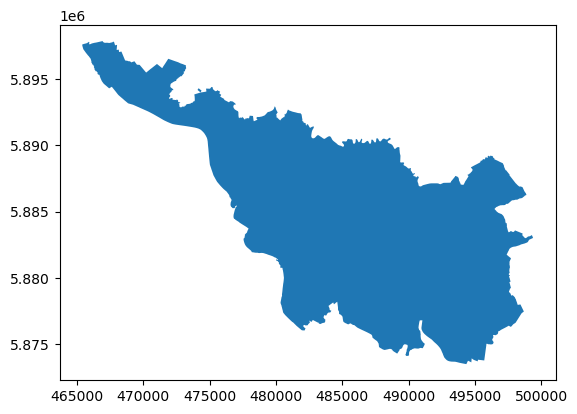

In [40]:
Zielgebiet_gdf.plot()
plt.show()

In [33]:
# Ausschlussflächen auf das Zielgebiet beschränken (Intersection)
Ausschlussflächen_merged = gpd.overlay(Ausschlussflächen_merged, Zielgebiet_gdf, how="intersection")


In [36]:
Ausschlussflächen_merged["geometry"] = Ausschlussflächen_merged.geometry.buffer(0)

In [38]:
# Filter: Nur Ausschlussflächen, die sich innerhalb des Zielgebiets befinden

Ausschlussflächen_merged = Ausschlussflächen_merged[Ausschlussflächen_merged.geometry.intersects(Zielgebiet_gdf.geometry.union_all())]



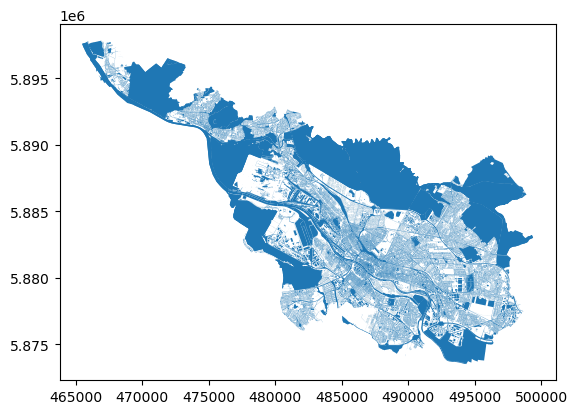

In [45]:
Ausschlussflächen_merged.plot()
plt.show()

In [48]:
# Leere Geometrien entfernen
Zielgebiet_gdf = Zielgebiet_gdf[~Zielgebiet_gdf.geometry.is_empty]
Ausschlussflächen_merged = Ausschlussflächen_merged[~Ausschlussflächen_merged.geometry.is_empty]

# Ungültige Geometrien entfernen (falls Reparatur nicht funktioniert hat)
Zielgebiet_gdf = Zielgebiet_gdf[Zielgebiet_gdf.geometry.is_valid]
Ausschlussflächen_merged = Ausschlussflächen_merged[Ausschlussflächen_merged.geometry.is_valid]

In [51]:
# Geometrien vereinfachen, um redundante Punkte zu entfernen
Zielgebiet_gdf["geometry"] = Zielgebiet_gdf.geometry.simplify(tolerance=0.01)
Ausschlussflächen_merged["geometry"] = Ausschlussflächen_merged.geometry.simplify(tolerance=0.01)

In [68]:
print(Ausschlussflächen_merged.geometry.is_empty.sum(), "leere Geometrien")
print((~Ausschlussflächen_merged.geometry.is_valid).sum(), "ungültige Geometrien")

0 leere Geometrien
0 ungültige Geometrien


In [61]:
#Radieren der Ausschlussflächen von der Gesamtfläche (Zielgebiet)

# Pfad zur Ausgabedatei
Geothermie_Potenzialflächen_file = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Berechnungsschritte/Geothermie_Potenzialflächen_file.GeoJSON"

# Radieren: Zielgebiet ohne Ausschlussflächen
Geothermie_Potenzialflächen = gpd.overlay(Zielgebiet_gdf, Ausschlussflächen_merged, how='difference', keep_geom_type=False)

# Ergebnisse speichern
Geothermie_Potenzialflächen.to_file(Geothermie_Potenzialflächen_file)

print(f"Potenzialflächen wurden erfolgreich unter {Geothermie_Potenzialflächen_file} gespeichert.")


GEOSException: TopologyException: found non-noded intersection between LINESTRING (477801 5.89202e+06, 477801 5.89202e+06) and LINESTRING (477801 5.89202e+06, 477801 5.89202e+06) at 477800.64870895364 5892016.7967436342

In [ ]:
# Konvertierung der Multipart- zu Singlepart-Features

# Pfad zur Ausgabedatei (Singlepart)
Geothermie_Potenzialflächen_SP_file = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Berechnungsschritte/Geothermie_Potenzialflächen_SP_file.shp"

# Multipart in Singlepart umwandeln
Geothermie_Potenzialflächen_SP = Geothermie_Potenzialflächen.explode(index_parts=False)

# Ergebnisse speichern
Geothermie_Potenzialflächen_SP.to_file(Geothermie_Potenzialflächen_SP_file)

print(f"Die Multipart-Geometrien wurden erfolgreich in Singlepart-Geometrien umgewandelt und unter {Geothermie_Potenzialflächen_SP_file} gespeichert.")


In [ ]:
# Filtern von Flächen mit einer spezifischen Mindestgröße (delete small areas)

# Pfad zur Ausgabedatei (Gefilterte Potenzialflächen)
Geothermie_Potenzialflächen_Area_filtered_file = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Berechnungsschritte/Geothermie_Potenzialflächen_Area_filtered_file.shp"

# Mindestgröße der Flächen (m²) --> eventuell als Feld parametrisieren
min_area = 10

# Filter: Nur Flächen größer als 10 m²
Geothermie_Potenzialflächen_Area_filtered = Geothermie_Potenzialflächen_SP[Geothermie_Potenzialflächen_SP.geometry.area > min_area]

# Gefilterte Geometrien speichern
Geothermie_Potenzialflächen_Area_filtered.to_file(Geothermie_Potenzialflächen_Area_filtered_file)

print(f"Gefilterte Potenzialflächen (Fläche > {min_area} m²) wurden erfolgreich unter {Geothermie_Potenzialflächen_Area_filtered_file} gespeichert.")

In [ ]:
# Auflösen der Geometrien durch einen Dissolve Befehl

# Pfad zur Ausgabedatei (Dissolved Ergebnis)
Geothermie_Potenzialflächen_final_file = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Ergebnisse/Geothermie_Potenzialflächen_final_file.shp"

# Geometrien auflösen (Dissolve)
dissolved_Geothermie_Potenzialflächen = unary_union(Geothermie_Potenzialflächen_Area_filtered['geometry'])

# Neues GeoDataFrame mit aufgelöster Geometrie
Geothermie_Potenzialflächen_final = gpd.GeoDataFrame({'geometry': [dissolved_Geothermie_Potenzialflächen]}, crs=Geothermie_Potenzialflächen_Area_filtered.crs)

# Ergebnisse speichern
Geothermie_Potenzialflächen_final.to_file(Geothermie_Potenzialflächen_final_file)

print(f"Die Potenzialflächen wurden erfolgreich aufgelöst und unter {Geothermie_Potenzialflächen_final_file} gespeichert.")

Folgende Zelle muss noch überarbeitet werden:

Geometrie berechnen

In [ ]:

# Pfad zur Ausgabedatei (Dissolved Ergebnis)
Geothermie_Potenzialflächen_final_area_file = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Ergebnisse/Geothermie_Potenzialflächen_final_area_file.shp"

# Fläche in Quadratmetern berechnen
Geothermie_Potenzialflächen_final['area_m2'] = Geothermie_Potenzialflächen_final.geometry.area  # Fläche wird in den Einheiten des CRS berechnet

# Ergebnisse speichern
Geothermie_Potenzialflächen_final.to_file(Geothermie_Potenzialflächen_final_area_file)

print(f"Die Flächen in Quadratmetern wurden erfolgreich berechnet und unter {Geothermie_Potenzialflächen_final_area_file} gespeichert.")

In [ ]:
#Erstellen von stichprobenartig gesetzten Punkten (Theoretische Bohrlochdichte)

def create_spatial_sampling_points(Geothermie_Potenzialflächen_final_file, Bohrlöcher_file, num_samples, min_distance):
    """
    Erstellt räumliche Stichprobenpunkte mit einem Mindestabstand.

    :param Geothermie_Potenzialflächen_final_file: Pfad zur Eingabedatei (Shapefile mit Polygonen)
    :param Bohrlöcher_file: Pfad zur Ausgabedatei (Shapefile mit Stichprobenpunkten)
    :param num_samples: Anzahl der zu generierenden Stichprobenpunkte
    :param min_distance: Mindestabstand zwischen den Punkten (in metrischen Einheiten)
    """

    # Liste zur Speicherung der Stichprobenpunkte
    sample_points = []

    # Generierung von Stichprobenpunkten
    while len(sample_points) < num_samples:
        # Zufällige Punkte innerhalb der Studienfläche generieren
        minx, miny, maxx, maxy = Geothermie_Potenzialflächen_final.bounds
        random_point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))

        # Prüfen, ob der Punkt innerhalb der Studienfläche liegt und den Mindestabstand einhält
        if Geothermie_Potenzialflächen_final.contains(random_point):
            if all(random_point.distance(existing_point) >= min_distance for existing_point in sample_points):
                sample_points.append(random_point)

    # Erstellung eines GeoDataFrame mit den Stichprobenpunkten
    Bohrlöcher = gpd.GeoDataFrame(geometry=sample_points, crs=Geothermie_Potenzialflächen_final.crs)

    # Ergebnisse speichern
    Bohrlöcher.to_file(Bohrlöcher_file)

    print(f"{num_samples} Stichprobenpunkte mit einem Mindestabstand von {min_distance} wurden erfolgreich unter {Bohrlöcher_file} gespeichert.")

# Beispielaufruf der Funktion
create_spatial_sampling_points(
    Geothermie_Potenzialflächen_final_file = "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Ergebnisse/Geothermie_Potenzialflächen_final_file.shp",
    Bohrlöcher_file= "/Users/hannesrottger/Desktop/Waermelyse/waermelyse/Geothermie Ergebnisse/Bohrlöcher_file.shp",
    num_samples=50,  # Anzahl der Stichprobenpunkte
    min_distance=100  # Mindestabstand in Metern
)